[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.pages.ornl.gov/en/tutorial/notebooks/display_list_of_file_name_vs_time_stamp)

<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS 

In [1]:
from __code.display_file_names_vs_time_stamp import DisplayFileNamesVsTimeStamp

%matplotlib notebook

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

** Using Debugging Mode! **


VBox(children=(HBox(children=(Label(value='IPTS-'), Text(value='', layout=Layout(width='10%')), Label(value='DOES NOT EXIST!', layout=Layout(width='20%'), _dom_classes=('result_label',)))), Label(value='OR'), HBox(children=(Label(value='Select Folder', layout=Layout(width='20%')), Select(layout=Layout(height='300px'), options=('BraggEdge', 'Brianne', 'DOE_letters', 'FITSimages', 'IPTS-12534', 'IPTS-13639_resonance_shawn', 'IPTS-14832', 'IPTS-15177', 'IPTS-16212', 'IPTS-16259', 'IPTS-16475', 'IPTS-16893', 'IPTS-17099', 'IPTS-17685-Siddharth', 'IPTS-17981', 'IPTS-18580', 'IPTS-18806', 'IPTS-18813', 'IPTS-19037', 'IPTS-19213', 'IPTS-19558', 'IPTS-19621-CLOCK', 'IPTS-19626', 'IPTS-19799', 'IPTS-19921-Charles', 'IPTS-19943-kashif', 'IPTS-20139-Hao-Liu', 'IPTS-20209-TOPAZ', 'IPTS-21115', 'IPTS-Das-Saikat', 'IPTS-raw', 'IPTS_test_normalization', 'IPTS_testing_time_spectra', 'ImagesToRegisterForGian', 'Indu', 'Keita_code', 'Pour_ibeatles_video', 'ResonanceImaging', 'SENSITIVE', 'SarmaGUI', 'SphereCoordinates3D', 'TempData', 'gian', 'iBeatles_debugging', 'shared', 'testing_Ed_algo_water_intake'), value='BraggEdge'))), Button(button_style='info', description='HELP', style=ButtonStyle())))

# Select Images

In [2]:
o_file_time_stamp = DisplayFileNamesVsTimeStamp(working_dir=system.System.get_working_dir())
o_file_time_stamp.select_image_folder()

VBox(children=(Label(value='Select Raw Images ...', layout=Layout(width='250px')), VBox(children=(HBox(children=(HBox(children=(Text(value='/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115', description='Location: ', layout=Layout(width='100%'), placeholder=''), Button(description='Jump', layout=Layout(border='1px solid gray', margin='5px 10px', width='100px'), style=ButtonStyle())), layout=Layout(border='1px solid lightgrey', margin='5px 50px 5px 5px', padding='3px', width='100%')),)), HBox(children=(VBox(children=(HBox(children=(Label(value='Search:'), Text(value='', layout=Layout(width='50%'))), layout=Layout(justify_content='flex-end')), SelectMultiple(description='Select', layout=Layout(height='260px', width='99%'), options=(' .', ' ..', ' .DS_Store     |     Thu Jul 26 10:25:53 2018', ' test          |     Directory'), value=())), layout=Layout(width='80%')), VBox(children=(Button(description='Change directory', layout=Layout(border='1px solid gray', margin='5px 40px'), style=ButtonStyle()), Button(description='Select', layout=Layout(border='1px solid blue', margin='auto 40px 5px'), style=ButtonStyle())))), layout=Layout(border='1px solid lightgrey', margin='5px', padding='10px')))), HTML(value='')))

HBox(children=(Label(value='Retrieving Time Stamp', layout=Layout(width='20%')), IntProgress(value=0, layout=Layout(width='50%'), max=7)))

#  Display Time Stamp (relative and absolute offsets)

<IPython.core.display.Javascript object>


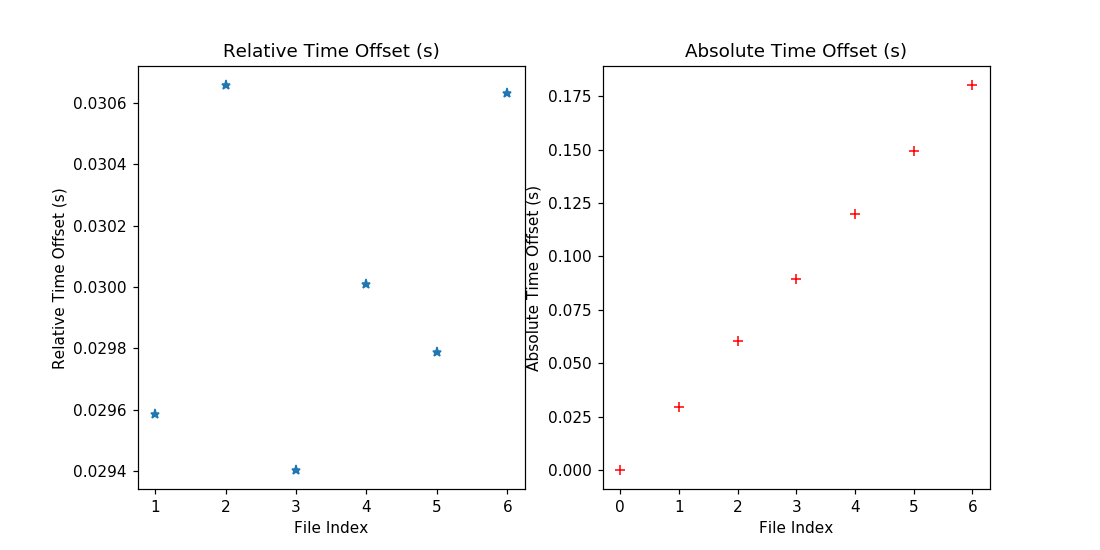

In [3]:
o_file_time_stamp.display()

# List Files Loaded 

In [4]:
import pprint
pprint.pprint(o_file_time_stamp.list_files)

['/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115/test/20180726_test_0000_0001.tiff',
 '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115/test/20180726_test_0000_0002.tiff',
 '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115/test/20180726_test_0000_0003.tiff',
 '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115/test/20180726_test_0000_0004.tiff',
 '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115/test/20180726_test_0000_0005.tiff',
 '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115/test/20180726_test_0000_0006.tiff',
 '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115/test/20180726_test_0000_0007.tiff']


In [5]:
from ipywidgets import widgets


In [6]:
len(o_file_time_stamp.list_files)

7

In [7]:
len(o_file_time_stamp.relative_time_offset)

7

In [25]:
relative_text_area = ["file name -> (current image acquistion time - previous image acquisition time) \n"]
for _index, _file in enumerate(o_file_time_stamp.list_files):
    _short_file = os.path.basename(_file)
    _relative_time = o_file_time_stamp.relative_time_offset[_index]
    _text = "{} -> {}".format(_short_file, _relative_time)
    relative_text_area.append(_text)
    
relative_text_area = "\n".join(relative_text_area)
    

In [26]:
absolute_text_area = ["file name -> (current image acquistion time - first image acquisition time) \n"]
for _index, _file in enumerate(o_file_time_stamp.list_files):
    _short_file = os.path.basename(_file)
    _absolute_time = o_file_time_stamp.absolute_time_offset[_index]
    _text = "{} -> {}".format(_short_file, _absolute_time)
    absolute_text_area.append(_text)
    
absolute_text_area = "\n".join(absolute_text_area)
    

In [23]:
children = [widgets.Textarea("", layout=widgets.Layout(width="100%",
                                                      height="300px")), widgets.Textarea()]
tab = widgets.Tab()
tab.children = children
tab.set_title(0, "Relative (s)")
tab.set_title(1, "Absolute (s)")

relative_text = children[0]
relative_text.value = relative_text_area
absolute_text.value = absolute_text_area8

tab

Tab(children=(Textarea(value='file name -> (current image acquistion time - previous image acquisition time) \n\n20180726_test_0000_0001.tiff -> nan\n20180726_test_0000_0002.tiff -> 0.029585838317871094\n20180726_test_0000_0003.tiff -> 0.03065776824951172\n20180726_test_0000_0004.tiff -> 0.029403209686279297\n20180726_test_0000_0005.tiff -> 0.030010223388671875\n20180726_test_0000_0006.tiff -> 0.029788970947265625\n20180726_test_0000_0007.tiff -> 0.03063225746154785', layout=Layout(height='300px', width='100%')), Textarea(value='')), _titles={'0': 'Relative (s)', '1': 'Absolute (s)'})